In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [2]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [3]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


C:\Users\Zuyyu\.conda\envs\agent_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          11,051 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,251 (946.29 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("trafficsign.h5")

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.3463 - loss: 2.8818 - val_accuracy: 0.8707 - val_loss: 0.5497
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7657 - loss: 0.8014 - val_accuracy: 0.9151 - val_loss: 0.2862
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8377 - loss: 0.5391 - val_accuracy: 0.9518 - val_loss: 0.1838
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8682 - loss: 0.4304 - val_accuracy: 0.9651 - val_loss: 0.1453
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8869 - loss: 0.3786 - val_accuracy: 0.9652 - val_loss: 0.1286
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8990 - loss: 0.3351 - val_accuracy: 0.9714 - val_loss: 0.1065
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9067 - loss: 0.3174 - val_accuracy: 0.9685 - val_loss: 0.1183
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9119 - loss: 0.2976 - 

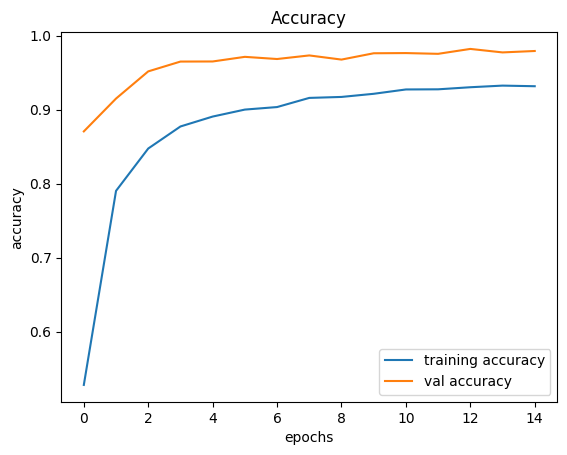

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

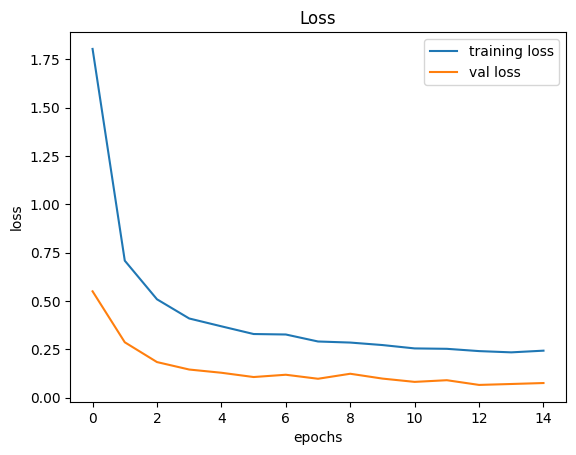

In [8]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
#testing accuracy on test dataset
y_test = pd.read_csv('Test.csv')

# Extract labels and image paths
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

# Ensure labels are integers
labels = labels.astype(int)

# Preprocess images
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))  # Make sure the size matches your model input
    data.append(np.array(image))

X_test = np.array(data)

# Make predictions
pred_probs = model.predict(X_test)  # Use predict instead of predict_classes
pred = np.argmax(pred_probs, axis=1)  # Get class with highest probability

# Ensure predictions are integers
pred = pred.astype(int)

# Calculate accuracy
accuracy = accuracy_score(labels, pred)
print("Accuracy on test data:", accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Accuracy on test data: 0.9417260490894696


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model

# Load the trained model to classify signs
model = load_model('trafficsign.h5')

# Dictionary to label all traffic signs classes
classes = {
    1: 'Speed limit (20km/h)',
    2: 'Speed limit (30km/h)',
    3: 'Speed limit (50km/h)',
    4: 'Speed limit (60km/h)',
    5: 'Speed limit (70km/h)',
    6: 'Speed limit (80km/h)',
    7: 'End of speed limit (80km/h)',
    8: 'Speed limit (100km/h)',
    9: 'Speed limit (120km/h)',
    10: 'No passing',
    11: 'No passing veh over 3.5 tons',
    12: 'Right-of-way at intersection',
    13: 'Priority road',
    14: 'Yield',
    15: 'Stop',
    16: 'No vehicles',
    17: 'Veh > 3.5 tons prohibited',
    18: 'No entry',
    19: 'General caution',
    20: 'Dangerous curve left',
    21: 'Dangerous curve right',
    22: 'Double curve',
    23: 'Bumpy road',
    24: 'Slippery road',
    25: 'Road narrows on the right',
    26: 'Road work',
    27: 'Traffic signals',
    28: 'Pedestrians',
    29: 'Children crossing',
    30: 'Bicycles crossing',
    31: 'Beware of ice/snow',
    32: 'Wild animals crossing',
    33: 'End speed + passing limits',
    34: 'Turn right ahead',
    35: 'Turn left ahead',
    36: 'Ahead only',
    37: 'Go straight or right',
    38: 'Go straight or left',
    39: 'Keep right',
    40: 'Keep left',
    41: 'Roundabout mandatory',
    42: 'End of no passing',
    43: 'End no passing vehicle with a weight greater than 3.5 tons'
}

# Initialize GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred_probs = model.predict(image)
    pred = np.argmax(pred_probs, axis=1)[0]
    sign = classes.get(pred + 1, "Unknown")
    print(sign)
    label.configure(foreground='#011638', text=sign)

def show_classify_button(file_path):
    classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25), (top.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image = im
        label.configure(text='')
        show_classify_button(file_path)
    except Exception as e:
        print(f"Error: {e}")

upload = Button(top, text="Upload an image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)

heading = Label(top, text="Check Traffic Sign", pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()